# Prediction of California Median House Prices Using Regression Techniques

#             Team Seven - Sara Alqaysi, Emma Oo, Tristan Demond
>                       M.S. Applied Data Science, University of San Diego
>                            ADS-505B: Applied Data Mining
>                                Professor Jules Malin
>                                    10/18,2021

Data Collection
This is a modified version of the California Housing Data used in the paper Pace, R. Kelley, and Ronald Barry. "Sparse
spatial autoregressions." Statistics & Probability Letters 33.3 (1997). This data was downloaded from Kaggle (Kadiwal,
2021). Using Python, the data was imported as a CSV file with GitHub as the collaborative platform. The Github link 
for the project was as follow:  
https://github.com/EmmaCOo/California-Housing-Prices-Data-

### Import required libraries

In [36]:
%matplotlib inline
import seaborn as sns 
import pandas as pd 
import numpy as np 
import os
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support 
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV 
import statsmodels.api as sm
from dmba import classificationSummary, gainsChart, liftChart
from dmba.metric import AIC_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import matplotlib.gridspec as gridspec
from scipy.stats import norm
from scipy.cluster import hierarchy as hc
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import regressionSummary, exhaustive_search
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from regressormetricgraphplot import *
from sklearn.datasets import make_regression
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [37]:
df = pd.read_csv('/Users/emmaoo/Desktop/California_Houses.csv')
df

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.1583,735501.8070,67432.51700,21250.21377
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733070,554279.8501,733236.8844,65049.90857,20880.60040
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.7171,733525.6829,64867.28983,18811.48745
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.2661,734095.2907,65287.13841,18031.04757
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.2661,734095.2907,65287.13841,18031.04757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,78100.0,1.5603,25,1665,374,845,330,39.48,-121.09,162031.481100,654530.1863,830631.5430,248510.05820,222619.89040
20636,77100.0,2.5568,18,697,150,356,114,39.49,-121.21,160445.433500,659747.0684,836245.9152,246849.88890,218314.42460
20637,92300.0,1.7000,17,2254,485,1007,433,39.43,-121.22,153754.341200,654042.2140,830699.5732,240172.22050,212097.93620
20638,84700.0,1.8672,18,1860,409,741,349,39.43,-121.32,152005.022200,657698.0077,834672.4619,238193.86590,207923.19920


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        20640 non-null  float64
 1   Median_Income             20640 non-null  float64
 2   Median_Age                20640 non-null  int64  
 3   Tot_Rooms                 20640 non-null  int64  
 4   Tot_Bedrooms              20640 non-null  int64  
 5   Population                20640 non-null  int64  
 6   Households                20640 non-null  int64  
 7   Latitude                  20640 non-null  float64
 8   Longitude                 20640 non-null  float64
 9   Distance_to_coast         20640 non-null  float64
 10  Distance_to_LA            20640 non-null  float64
 11  Distance_to_SanDiego      20640 non-null  float64
 12  Distance_to_SanJose       20640 non-null  float64
 13  Distance_to_SanFrancisco  20640 non-null  float64
dtypes: flo

In [39]:
df.describe()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,2.064000e+04,2.064000e+04,20640.000000,20640.000000
mean,206855.816909,3.870671,28.639486,2635.763081,537.898014,1425.476744,499.539680,35.631861,-119.569704,40509.264883,2.694220e+05,3.981649e+05,349187.551219,386688.422291
std,115395.615874,1.899822,12.585558,2181.615252,421.247906,1132.462122,382.329753,2.135952,2.003532,49140.039160,2.477324e+05,2.894006e+05,217149.875026,250122.192316
min,14999.000000,0.499900,1.000000,2.000000,1.000000,3.000000,1.000000,32.540000,-124.350000,120.676447,4.205891e+02,4.849180e+02,569.448118,456.141313
25%,119600.000000,2.563400,18.000000,1447.750000,295.000000,787.000000,280.000000,33.930000,-121.800000,9079.756762,3.211125e+04,1.594264e+05,113119.928650,117395.477500
50%,179700.000000,3.534800,29.000000,2127.000000,435.000000,1166.000000,409.000000,34.260000,-118.490000,20522.019100,1.736675e+05,2.147398e+05,459758.877000,526546.661700
75%,264725.000000,4.743250,37.000000,3148.000000,647.000000,1725.000000,605.000000,37.710000,-118.010000,49830.414478,5.271562e+05,7.057954e+05,516946.491000,584552.007950
max,500001.000000,15.000100,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,41.950000,-114.310000,333804.686400,1.018260e+06,1.196919e+06,836762.678200,903627.663300


In [40]:
# Finding out how many unqiue values there are
dict = {}
for col in list(df.columns):
    dict[col] = df[col].value_counts().shape[0]
pd.DataFrame(dict,index=["unique count"]).T

,unique count
Median_House_Value,3842
Median_Income,12928
Median_Age,52
Tot_Rooms,5926
Tot_Bedrooms,1928
Population,3888
Households,1815
Latitude,862
Longitude,844
Distance_to_coast,12590


In [41]:
cont_col = ['Median_Income', 'Median_Age', 'Tot_Rooms', 'Tot_Bedrooms', 'Population', 'Households', 'Distance_to_coast', 
            'Distance_to_LA', 'Distance_to_SanDiego', 'Distance_to_SanJose', 'Distance_to_SanFrancisco']
loc_col = ['Latitude', 'Longitude']
dist_col = ['Distance_to_coast', 'Distance_to_LA', 'Distance_to_SanDiego', 'Distance_to_SanJose', 'Distance_to_SanFrancisco']
target = 'Median_House_Value'

Feature: Median_House_Value, Skewness: 0.97776, Kurtosis: 0.32787


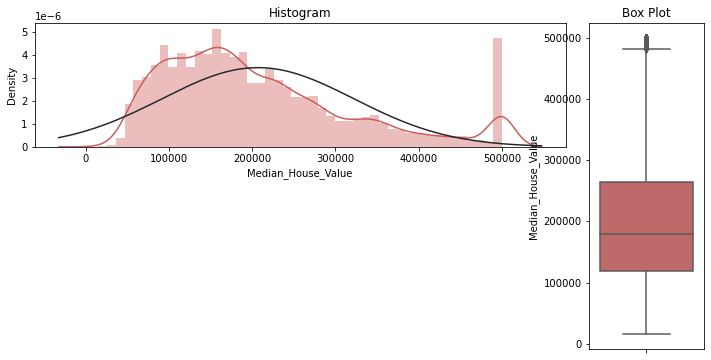

In [42]:
def visualize_target(df, feature):
    print('Feature: {}, Skewness: {}, Kurtosis: {}'.format(feature,round(df[feature].skew(),5),round(df[feature].kurt(),5)))
    
    fig = plt.figure(constrained_layout=True, figsize=(12,6))
    grid = gridspec.GridSpec(ncols=5, nrows=5, figure=fig)

    ax1 = fig.add_subplot(grid[0:2, :4])
    ax1.set_title('Histogram')
    sns.distplot(df.loc[:,feature], norm_hist=True,fit=norm, ax = ax1,color='indianred')

    ax3 = fig.add_subplot(grid[:, 4])
    ax3.set_title('Box Plot')
    sns.boxplot(y=df.loc[:,feature], orient='v', ax = ax3,color='indianred')
    
visualize_target(df,target)

In [43]:
def remove_outlier(df, col_name):
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    outlier = []
    for i in df[col_name]:
        if i<(q1 - 1.5 * iqr) or i>(q3 + 1.5 * iqr):
            outlier.append(i)
    outlier = pd.DataFrame(outlier,columns=['outlier'])
    print('{}% Outlier removed in {} according to IQR'.format(round((outlier.shape[0]/df.shape[0])*100,2),col_name))
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df = df[(df[col_name] > fence_low) & (df[col_name] < fence_high)]
    return df

df = remove_outlier(df,target)

5.19% Outlier removed in Median_House_Value according to IQR


In [44]:
df["Median_House_Value"] = np.log(df["Median_House_Value"])

Feature: Median_House_Value, Skewness: -0.31629, Kurtosis: -0.36984


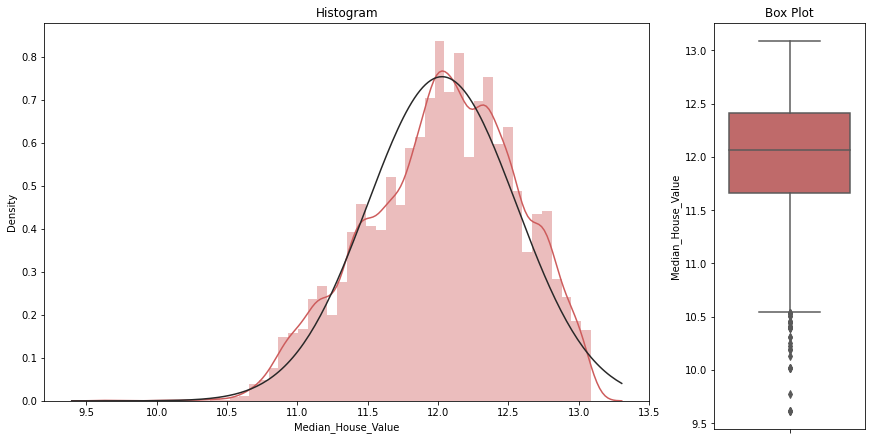

In [45]:
visualize_target(df,target)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


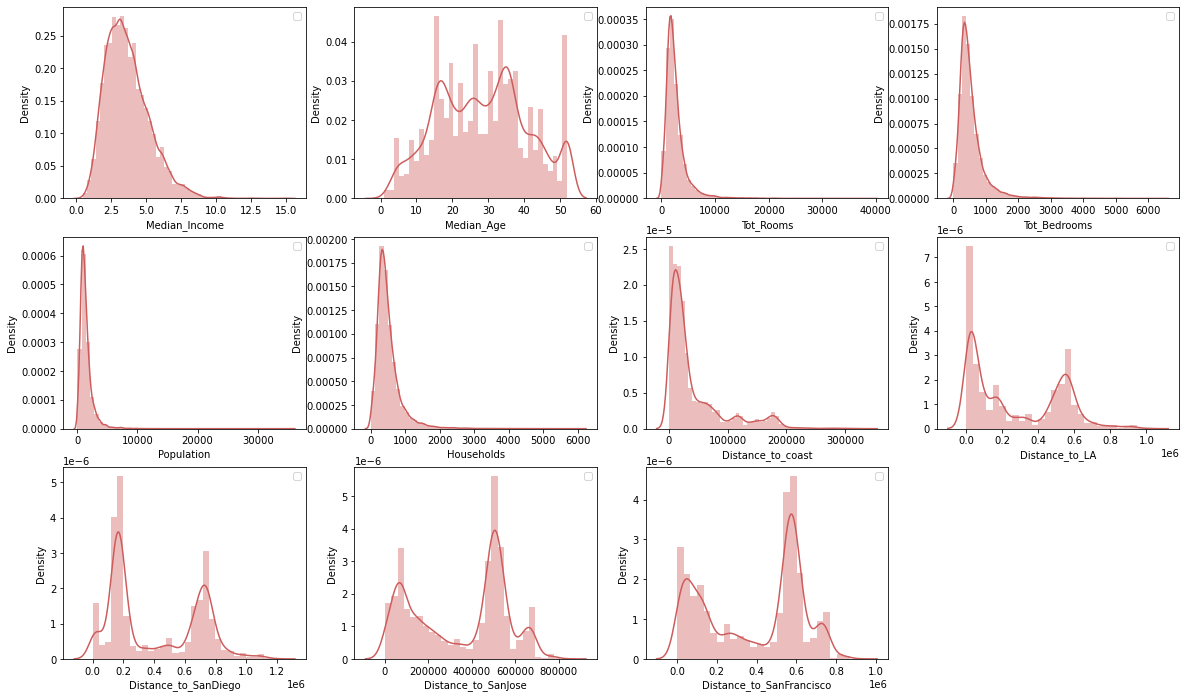

In [46]:
plt.figure(figsize=(20, 12)) 
for i, column in enumerate(cont_col, 1):
    plt.subplot(3, 4, i)
    sns.distplot(x=df[column],color='indianred') 
    plt.legend() 
    plt.xlabel(column) 

<AxesSubplot:>

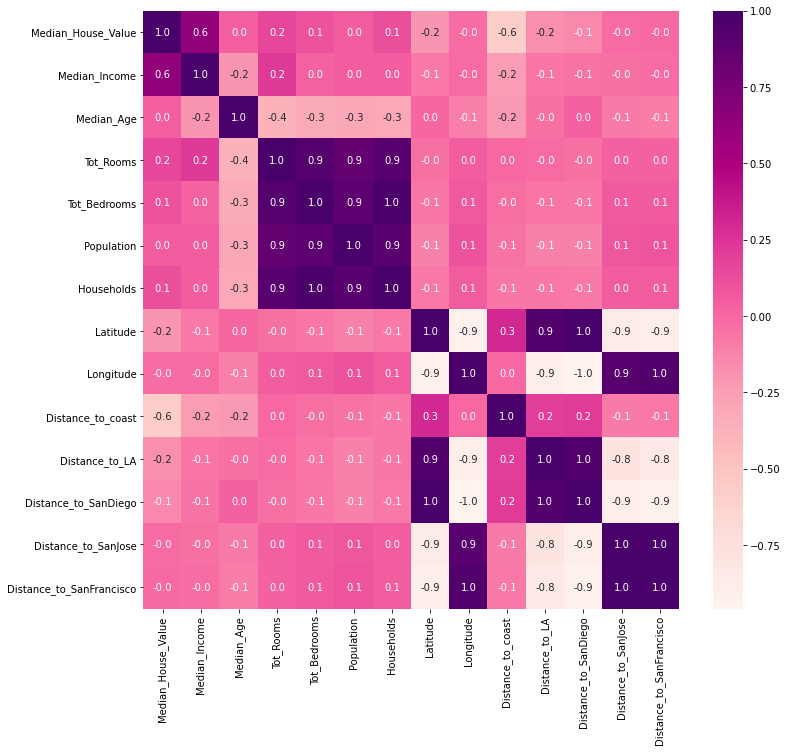

In [47]:
#Heatmap of a Correlation Table with new data frame
corr = df.corr()
fig, ax = plt.subplots()
fig.set_size_inches(12,11)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdPu", center=0, ax=ax)

<AxesSubplot:>

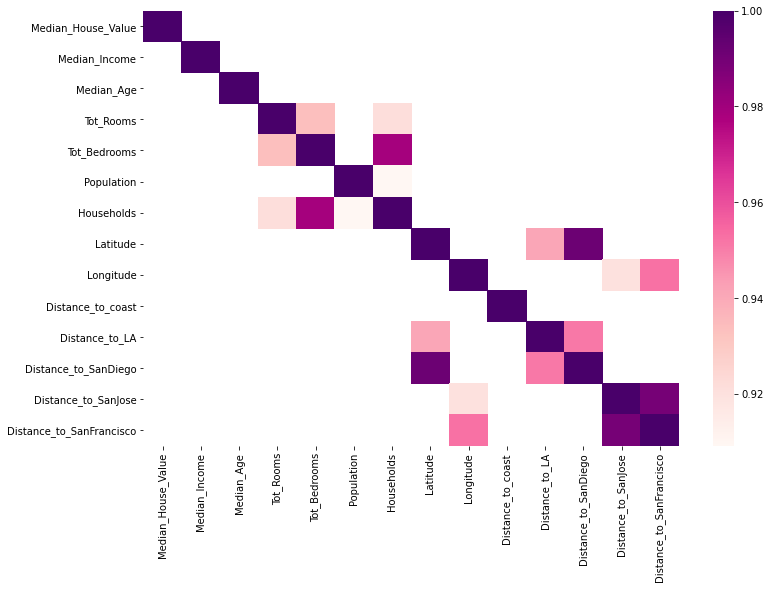

In [48]:
#Filtering out highly correlated variables (>0.9)with heatmap 
corr = df.corr()
kot = corr[corr>=.9]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="RdPu")

Highly correlated variables (>0.9) were observed among Tot_Rooms,Tot_Bedrooms,Households,and Population. Tot_Room, Tot_Bedrooms, Households will be excluded since Household variable alone can represent them.   

Another set of high correlation between geographical variables: Latitude, Longitude, Distance_to_SanDiego, Distance_to_SanJose, and Distance_to_SanFrancisco. Thus, Latitude, Longitude, Distance_to_SanJose, and Distance_to_SanDiego will be dropped.  Keeping only Distance_to_LA will cover Distance_to_SanDiego and Distance_to_SanFrancisco will cover Distance_to_SanJose since they are in close proximity. 

In [49]:
#dropping highly correlated variables
df = df.drop(columns= ['Latitude','Longitude', 'Distance_to_SanJose','Tot_Bedrooms',
             'Tot_Rooms','Population','Distance_to_SanDiego'])

df #new data frame after removing highly correlated attributes

,Median_House_Value,Median_Income,Median_Age,Households,Distance_to_coast,Distance_to_LA,Distance_to_SanFrancisco
0,13.022764,8.3252,41,126,9263.040773,556529.1583,21250.21377
1,12.789684,8.3014,21,1138,10225.733070,554279.8501,20880.60040
2,12.771671,7.2574,52,177,8259.085109,554610.7171,18811.48745
3,12.740517,5.6431,52,219,7768.086571,555194.2661,18031.04757
4,12.743151,3.8462,52,259,7768.086571,555194.2661,18031.04757
...,...,...,...,...,...,...,...
20635,11.265745,1.5603,25,330,162031.481100,654530.1863,222619.89040
20636,11.252859,2.5568,18,114,160445.433500,659747.0684,218314.42460
20637,11.432799,1.7000,17,433,153754.341200,654042.2140,212097.93620
20638,11.346871,1.8672,18,349,152005.022200,657698.0077,207923.19920


# DATA SPLITTING (training, validation, and test sets)

There were total records of 19569 and seven attributes after removing the outliers and highly correlated variables. The data set was then partitioned into training, validation, and test data sets (40%, 35%, and 25% respectively). There were 7828 records in training, 6849 records in validation, and 4620 records in test data sets with 7 attributes.


In [50]:
#Total records after removing outliers = 19569, 
#Splitting train = 7828(40%), valid = 6849(35%), test = 4892(25%)

train, temp = train_test_split(df, train_size= 7828, random_state=1)
valid, test = train_test_split(temp, train_size= 6849, random_state=1)
print('Training   : ', train.shape)
print('Validation : ', valid.shape)
print('Test : ', test.shape)

Training   :  (7828, 7)
Validation :  (6849, 7)
Test :  (4892, 7)


# MODEL BUILDING STRATEGIES

Regression Analysis is used in many studies including the predictions of house prices. Since the purpose of this study was to predict the numeric and continuous target variable of house prices, Multiple Linear Regression, Regression Tree, Random Forest, and Ridge and Lasso Regression models were selected. 

Model will be trained on the train data set and evaluated with validation data set for better performance.  The best model will be selected by comparing the metrics of each model on the test data set. 

The selected models were built to predict the target outcome of Median House Value by using the independent predictors: 'Median_Income', 'Median_Age', 'Households', 'Distance_to_coast', 'Distance_to_LA', 'Distance_to_SanFrancisco'. The target outcome was the Median House Value. 


In [51]:
#Assigning predictors and outcome variables
predictors = list(df.columns)
outcome = 'Median_House_Value'
predictors.remove(outcome)
print(predictors)
print(outcome)

#Assigning Xs,ys for train, valid, and test data sets
train_X = train[predictors] #train_X, train_y for train data set
train_y = train[outcome]
valid_X = valid[predictors]  #valid_X, valid_y for valid data set
valid_y = valid[outcome]
X = test[predictors]    #X, y for test data set
y = test[outcome]

['Median_Income', 'Median_Age', 'Households', 'Distance_to_coast', 'Distance_to_LA', 'Distance_to_SanFrancisco']
Median_House_Value


# MULTIPLE LINEAR REGRESSION MODEL

For the Multiple Linear Regression model, the chosen parameter of stepwise regression was used for the best predictors. 


In [52]:
#Multiple Linear Regression Model with stepwise regression for selecting the best variables

def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    return model.fit(train_X[variables], train_y)

def score_model(model, variables):
    if len(variables) == 0:
        return mean_squared_error(train_y, [train_y.mean()] * len(train_y), model)
    return mean_squared_error(train_y, model.predict(train_X[variables]))


linear_model, best_variables1 = stepwise_selection(predictors, train_model, score_model, 
                                                  direction='stepwise', verbose=True)
print(best_variables1)
linear_predictors = best_variables1


Variables: Median_Income, Median_Age, Households, Distance_to_coast, Distance_to_LA, Distance_to_SanFrancisco
Start: score=0.28, constant
Step: score=0.16, add Median_Income
Step: score=0.11, add Distance_to_coast
Step: score=0.11, add Households
Step: score=0.11, add Median_Age
Step: score=0.11, add Distance_to_LA
Step: score=0.11, add Distance_to_SanFrancisco
Step: score=0.11, unchanged None
['Median_Income', 'Distance_to_coast', 'Households', 'Median_Age', 'Distance_to_LA', 'Distance_to_SanFrancisco']



The best predictor was Median_Income with a score of 01.6, and the rest were  Distance_to_coast, Households, Median_Age, Distance_to_LA, Distance_to_San_Francisco with the same score of 0.11. All the predictors were used for training the model since all revealed similar scores.



In [53]:
#Regression Statistics by MULTIPLE LINEAR REGRESSION MODEL
print('Train Performance')
regressionSummary(train_y, linear_model.predict(train_X[best_variables1]))

print('Validation Performance')
regressionSummary(valid_y, linear_model.predict(valid_X[best_variables1]))

print('Test Performance')
regressionSummary(y, linear_model.predict(X[best_variables1]))

Train Performance

Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 0.3265
            Mean Absolute Error (MAE) : 0.2516
          Mean Percentage Error (MPE) : -0.0750
Mean Absolute Percentage Error (MAPE) : 2.1019
Validation Performance

Regression statistics

                      Mean Error (ME) : -0.0043
       Root Mean Squared Error (RMSE) : 0.3250
            Mean Absolute Error (MAE) : 0.2511
          Mean Percentage Error (MPE) : -0.1144
Mean Absolute Percentage Error (MAPE) : 2.1027
Test Performance

Regression statistics

                      Mean Error (ME) : 0.0045
       Root Mean Squared Error (RMSE) : 0.3183
            Mean Absolute Error (MAE) : 0.2474
          Mean Percentage Error (MPE) : -0.0365
Mean Absolute Percentage Error (MAPE) : 2.0652


# REGRESSION TREE MODEL

The Stepwise regression was also used for the Regression Tree model. 


In [54]:
# regression tree
def train_model(variables):
    if len(variables) == 0:
        return None
    model = DecisionTreeRegressor()
    return model.fit(train_X[variables], train_y)

def score_model(model, variables):
    if len(variables) == 0:
        return mean_squared_error(train_y, [train_y.mean()] * len(train_y), model)
    return mean_squared_error(train_y, model.predict(train_X[variables]))

tree_model, best_variables = stepwise_selection(predictors, train_model, score_model, direction='forward', verbose=True)
print(best_variables)

Variables: Median_Income, Median_Age, Households, Distance_to_coast, Distance_to_LA, Distance_to_SanFrancisco
Start: score=0.28, constant
Step: score=0.01, add Distance_to_coast
Step: score=0.00, add Median_Income
Step: score=0.00, unchanged None
['Distance_to_coast', 'Median_Income']


The model was built using the best predictors, Distance_to_coast and Median_Income. 

In [55]:
#Regression Statistics by REGRESSION TREE MODEL
print('Train Performance')
regressionSummary(train_y, tree_model.predict(train_X[best_variables]))
print('Validation performance')
regressionSummary(valid_y, tree_model.predict(valid_X[best_variables]))
print('Test performance')
regressionSummary(y, tree_model.predict(X[best_variables]))

Train Performance

Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 0.0000
            Mean Absolute Error (MAE) : 0.0000
          Mean Percentage Error (MPE) : 0.0000
Mean Absolute Percentage Error (MAPE) : 0.0000
Validation performance

Regression statistics

                      Mean Error (ME) : -0.0170
       Root Mean Squared Error (RMSE) : 0.4364
            Mean Absolute Error (MAE) : 0.3280
          Mean Percentage Error (MPE) : -0.2122
Mean Absolute Percentage Error (MAPE) : 2.7435
Test performance

Regression statistics

                      Mean Error (ME) : -0.0059
       Root Mean Squared Error (RMSE) : 0.4403
            Mean Absolute Error (MAE) : 0.3330
          Mean Percentage Error (MPE) : -0.1172
Mean Absolute Percentage Error (MAPE) : 2.7772


Since it was all zero percent error for train data set, overfitting was noted for Regression Tree model.

# RANDOM FOREST

Random Forest model was built using n_estimators of 600 and random_state 1. The two most Important features were Distance_to_coast and Median_Income. 


In [56]:
rf = RandomForestRegressor(n_estimators=500, random_state=1)
rf.fit(train_X, train_y)

RandomForestRegressor(n_estimators=500, random_state=1)

                    feature  importance       std
1                Median_Age    0.034889  0.003350
2                Households    0.047419  0.004691
4            Distance_to_LA    0.091673  0.006557
5  Distance_to_SanFrancisco    0.099123  0.006975
0             Median_Income    0.343972  0.041653
3         Distance_to_coast    0.382924  0.042084


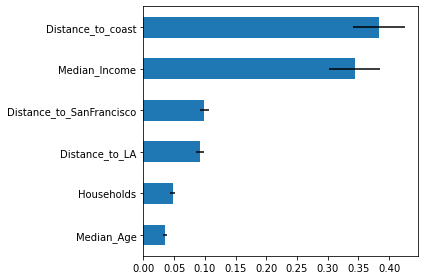

In [59]:
#To see the most important features

importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

df = pd.DataFrame({'feature': train_X.columns, 'importance': importances, 'std': std})
df = df.sort_values('importance')
print(df)

ax = df.plot(kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('')

plt.tight_layout()
plt.show()

Random Forest model was built using n_estimators of 600 and random_state 1. The two most Important features were Distance_to_coast and Median_Income. 


In [60]:
#Regression Statistics by RANDOM FOREST MODEL
regressionSummary(train_y, rf.predict(train_X))
regressionSummary(valid_y, rf.predict(valid_X))
regressionSummary(y, rf.predict(X))


Regression statistics

                      Mean Error (ME) : 0.0006
       Root Mean Squared Error (RMSE) : 0.0889
            Mean Absolute Error (MAE) : 0.0633
          Mean Percentage Error (MPE) : -0.0107
Mean Absolute Percentage Error (MAPE) : 0.5281

Regression statistics

                      Mean Error (ME) : -0.0071
       Root Mean Squared Error (RMSE) : 0.2435
            Mean Absolute Error (MAE) : 0.1716
          Mean Percentage Error (MPE) : -0.1043
Mean Absolute Percentage Error (MAPE) : 1.4368

Regression statistics

                      Mean Error (ME) : 0.0007
       Root Mean Squared Error (RMSE) : 0.2300
            Mean Absolute Error (MAE) : 0.1647
          Mean Percentage Error (MPE) : -0.0341
Mean Absolute Percentage Error (MAPE) : 1.3736


## Lasso Regression

We're going to test Ridge and Lasso regression as they're two simple techniques that help reduce model complexity and prevent over-fitting that might occur from simple linear regression.

In [61]:
lasso = Lasso()
lasso.fit(train_X,train_y)
train_score=lasso.score(train_X, train_y)
test_score=lasso.score(valid_X, valid_y)
coeff_used = np.sum(lasso.coef_!=0)

print ("training score:", train_score)
print ("test score: ", test_score)
print ("number of features used: ", coeff_used)

training score: 0.3544637691778747
test score:  0.38077628755518533
number of features used:  4


In [62]:
# we'll tune lasso to alpha = 0.01

lasso_001 = Lasso(alpha=0.01, max_iter=10e5)
lasso_001.fit(train_X, train_y)

train_score001=lasso_001.score(train_X, train_y)
test_score001=lasso_001.score(valid_X, valid_y)
coeff_used001 = np.sum(lasso_001.coef_!=0)

print ("training score for alpha=0.01:", train_score001)
print ("test score for alpha =0.01: ", test_score001)
print ("number of features used: for alpha =0.01:", coeff_used001)

training score for alpha=0.01: 0.6160676953559018
test score for alpha =0.01:  0.6307185175705017
number of features used: for alpha =0.01: 6


In [63]:
# we'll tune lasso to alpha = 0.0001

lasso_00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso_00001.fit(train_X, train_y)

train_score00001=lasso_00001.score(train_X, train_y)
test_score00001=lasso_00001.score(valid_X, valid_y)
coeff_used00001 = np.sum(lasso_00001.coef_!=0)

print ("training score for alpha=0.0001:", train_score00001)
print ("test score for alpha =0.0001: ", test_score00001)
print ("number of features used: for alpha =0.0001:", coeff_used00001)

training score for alpha=0.0001: 0.6162504994214293
test score for alpha =0.0001:  0.6312128947107364
number of features used: for alpha =0.0001: 6


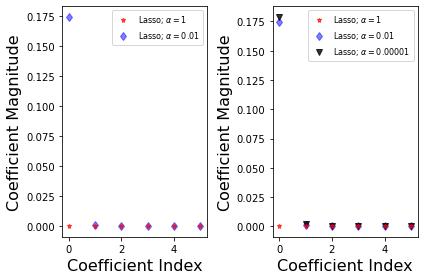

In [64]:
# plot the coefficients

plt.subplot(1,2,1)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso_001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=8,loc=1)
plt.subplot(1,2,2)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso_001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.plot(lasso_00001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.00001$') # alpha here is for transparency
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=8,loc=1)
plt.tight_layout()
plt.show()

In [65]:
#Regression Statistics by Lasso Regression MODEL
regressionSummary(train_y, lasso_00001.predict(train_X))
regressionSummary(valid_y, lasso_00001.predict(valid_X))
regressionSummary(y, lasso_00001.predict(X))


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 0.3265
            Mean Absolute Error (MAE) : 0.2516
          Mean Percentage Error (MPE) : -0.0750
Mean Absolute Percentage Error (MAPE) : 2.1019

Regression statistics

                      Mean Error (ME) : -0.0043
       Root Mean Squared Error (RMSE) : 0.3250
            Mean Absolute Error (MAE) : 0.2511
          Mean Percentage Error (MPE) : -0.1144
Mean Absolute Percentage Error (MAPE) : 2.1027

Regression statistics

                      Mean Error (ME) : 0.0045
       Root Mean Squared Error (RMSE) : 0.3183
            Mean Absolute Error (MAE) : 0.2474
          Mean Percentage Error (MPE) : -0.0365
Mean Absolute Percentage Error (MAPE) : 2.0652


## Ridge Regression

In [66]:
# here we'll tune alpha to 0.01 & 100, the higher the alpha, more limitations on the coefficients.

# alpha = 0.1
RR = Ridge(alpha=0.01) 
RR.fit(train_X, train_y)

Ridge_train_score=RR.score(train_X, train_y)
Ridge_test_score=RR.score(valid_X, valid_y)
coeff_used = np.sum(lasso.coef_!=0)

print ("training score:", Ridge_train_score)
print ("test score: ", Ridge_test_score)
print ("number of features used: ", coeff_used)

training score: 0.6162505177035763
test score:  0.6312162077631198
number of features used:  4


In [67]:
# alpha = 100
rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(train_X, train_y)

Ridge_train_score100 = rr100.score(train_X, train_y)
Ridge_test_score100 = rr100.score(valid_X, valid_y)
coeff_used = np.sum(lasso.coef_!=0)

print ("training score:", Ridge_train_score100)
print ("test score: ", Ridge_test_score100)
print ("number of features used: ", coeff_used)

training score: 0.6162419109773882
test score:  0.6311403965333511
number of features used:  4


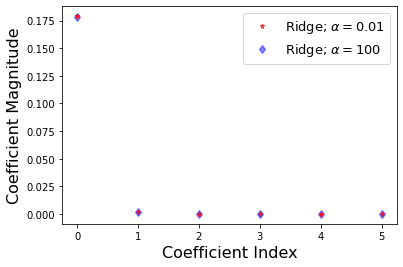

In [68]:
# plot the coefficients

plt.plot(RR.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) 
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') 
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=1)
plt.show()

In [69]:
#Regression Statistics by Ridge Regression MODEL
regressionSummary(train_y, rr100.predict(train_X))
regressionSummary(valid_y, rr100.predict(valid_X))
regressionSummary(y, rr100.predict(X))


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 0.3265
            Mean Absolute Error (MAE) : 0.2516
          Mean Percentage Error (MPE) : -0.0752
Mean Absolute Percentage Error (MAPE) : 2.1019

Regression statistics

                      Mean Error (ME) : -0.0043
       Root Mean Squared Error (RMSE) : 0.3250
            Mean Absolute Error (MAE) : 0.2511
          Mean Percentage Error (MPE) : -0.1150
Mean Absolute Percentage Error (MAPE) : 2.1030

Regression statistics

                      Mean Error (ME) : 0.0045
       Root Mean Squared Error (RMSE) : 0.3183
            Mean Absolute Error (MAE) : 0.2474
          Mean Percentage Error (MPE) : -0.0369
Mean Absolute Percentage Error (MAPE) : 2.0653


# RESULTS AND FINAL MODEL SELECTION 

In [110]:
#REGRESSION STATISTICS OF DIFFERNT MODELS (BASED ON THE TEST DATA)

print("MULTIPLE LINEAR REGRESSION:")
regressionSummary(y,linear_model.predict(X[best_variables1]))

print ("LASSO:")
regressionSummary(y,lasso_00001.predict(X))

print ("RIDGE:")
regressionSummary(y,rr100.predict(X))

print("REGRESSION TREE MODEl:")
regressionSummary(y, tree_model.predict(X[best_variables]))

print("RANDOM FOREST:")
regressionSummary(y, rf.predict(X))

#According to Regression Statistics and Residual Errors' plot, RANDOM FOREST DEEMS THE BEST MODEL. 

MULTIPLE LINEAR REGRESSION:

Regression statistics

                      Mean Error (ME) : 0.0045
       Root Mean Squared Error (RMSE) : 0.3183
            Mean Absolute Error (MAE) : 0.2474
          Mean Percentage Error (MPE) : -0.0365
Mean Absolute Percentage Error (MAPE) : 2.0652
LASSO:

Regression statistics

                      Mean Error (ME) : 0.0045
       Root Mean Squared Error (RMSE) : 0.3183
            Mean Absolute Error (MAE) : 0.2474
          Mean Percentage Error (MPE) : -0.0365
Mean Absolute Percentage Error (MAPE) : 2.0652
RIDGE:

Regression statistics

                      Mean Error (ME) : 0.0045
       Root Mean Squared Error (RMSE) : 0.3183
            Mean Absolute Error (MAE) : 0.2474
          Mean Percentage Error (MPE) : -0.0369
Mean Absolute Percentage Error (MAPE) : 2.0653
REGRESSION TREE MODEl:

Regression statistics

                      Mean Error (ME) : -0.0059
       Root Mean Squared Error (RMSE) : 0.4403
            Mean Absolute Error (MAE

In [120]:
#Printing R2 and RMSE metrics from each model 

pred_test = linear_model.predict(X[best_variables1])
pred_RT_test = tree_model.predict(X[best_variables])
pred_RF_test = rf.predict(X)

print('Multiple Linear Regression:', CompareModels.R2AndRMSE(y_test=y, y_pred=pred_test))

print('Random Forest:', CompareModels.R2AndRMSE(y_test=y, y_pred= rf.predict(X)))
      
print('Regression Tree:', CompareModels.R2AndRMSE(y_test=y, y_pred=pred_RT_test))

print ('Lasso Regression:', CompareModels.R2AndRMSE(y_test=y, y_pred = lasso_00001.predict(X)))

print ('Ridge Regression:', CompareModels.R2AndRMSE(y_test =y, y_pred = rr100.predict(X)))



Multiple Linear Regression: (0.6282688626250624, 0.3182997742391397)
Random Forest: (0.8058548489465904, 0.23003034691641602)
Regression Tree: (0.28861003628123205, 0.440327416609539)
Lasso Regression: (0.6282666086810951, 0.31830073922255964)
Ridge Regression: (0.6282273903835631, 0.31831752932556895)


In [139]:
#Creating Summary Metrics Table of each model on test data set

data = {'Model': ['MLR', 'Lasso', 'Ridge', 'Regression Tree', 'Random Forest'],
        'R2': [0.6283, 0.6283, 0.6282, 0.2886, 0.8059],
        'ME': [0.0007,0.0045,0.0045,-0.0059,0.0007],
        'RMSE':[0.2300,0.3183,0.3183, 0.4403,0.2300],
        'MAE': [0.1647,0.2474,0.2474,0.3330,0.1647],
        'MPE': [-0.0341,-0.0365,-0.0369,-0.1172,-0.0341],
        'MAPE':[1.3736,2.0652,2.0653,2.7772,1.3736],
        }
Metric_Table = pd.DataFrame(data)
Metric_Table

,Model,R2,ME,RMSE,MAE,MPE,MAPE
0,MLR,0.6283,0.0007,0.2300,0.1647,-0.0341,1.3736
1,Lasso,0.6283,0.0045,0.3183,0.2474,-0.0365,2.0652
2,Ridge,0.6282,0.0045,0.3183,0.2474,-0.0369,2.0653
3,Regression Tree,0.2886,-0.0059,0.4403,0.3330,-0.1172,2.7772
4,Random Forest,0.8059,0.0007,0.2300,0.1647,-0.0341,1.3736


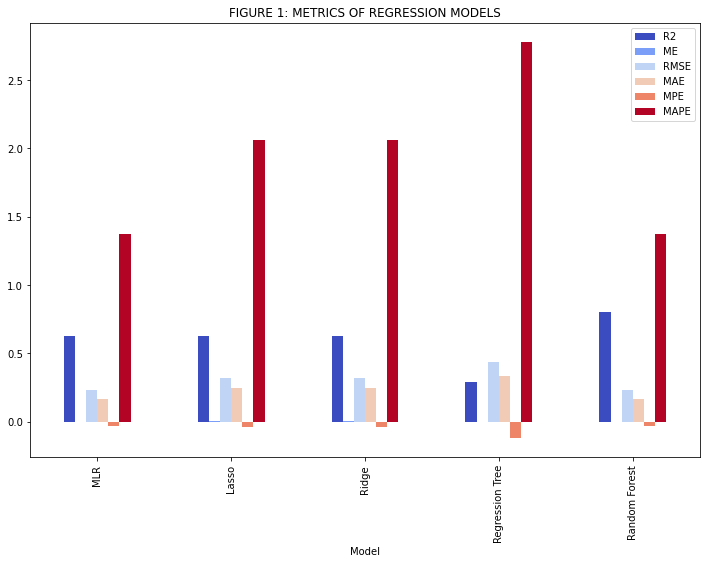

In [205]:
#Bargraph for Comparison of Metrics for Each Model

Metric_Table.plot(x="Model", y=["R2", "ME","RMSE","MAE","MPE",'MAPE'], kind="bar", figsize=(12,8), colormap='coolwarm')
plt.title('FIGURE 1: METRICS OF REGRESSION MODELS')
plt.show()

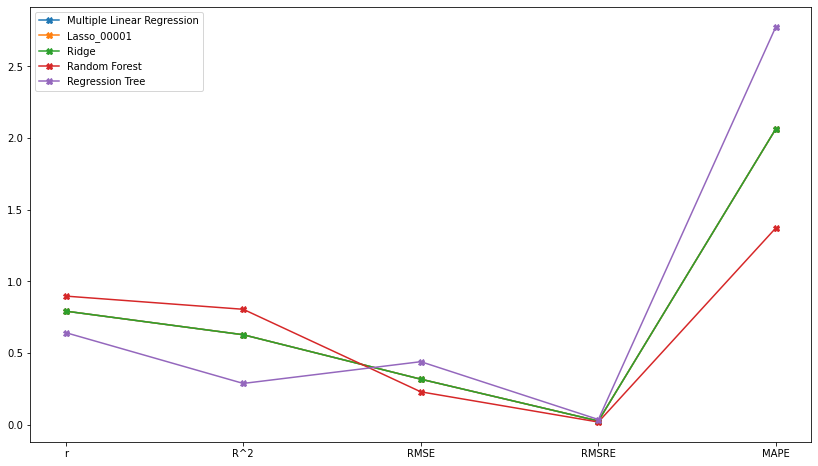

In [137]:
#Plotting graphs to show the best model and similarity between MLR, LASSO, and RIDGE.

plot = CompareModels()

plot.add(model_name = 'Multiple Linear Regression', y_test=y, y_pred= pred_test)

plot.add(model_name = 'Lasso_00001', y_test =y, y_pred = lasso_00001.predict(X))

plot.add(model_name = 'Ridge', y_test =y, y_pred = rr100.predict(X))

plot.add(model_name='Random Forest', y_test=y, y_pred=pred_RF_test)

plot.add(model_name = 'Regression Tree', y_test=y, y_pred=pred_RT_test)


plot.show(figsize=(14,8))

#RANDOM FOREST PERFORMED THE BEST. 
#THE METRICS FOR MLR, RIDGE, AND LASSO WERE ALMOST IDENTICAL AND OVERLAPPED IN THE GRAPH.
#REGRESSION TREE YIELED THE LEAST R2 VALUE AND HIGHEST ERROR RATES. 

From the Metric Table, metrics of Multiple Linear Regression, Ridge,and Lasso were almost identical with R2 value of 0.6282 (62.82%). Thus, in the above graph, all three overlap together and doesn't show any difference between these three models. 

The metrics of Regression Tree for the train data set showed zero percent error revealing the overfitting behavior and the R2 value of 28.86%, the lowest score out of all the models. 

Among them, Random Forest scored the highest R2 value of 80.59% best fitting the data set. The metrics for the Random Forest also ranked the lowest percentage errors of ME, RMSE, MAE, MPE, and MAPE as shown in the above figures. Thus, Random Forest deemed the best model for the prediction of California house prices.  
